## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# importing the libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-sizing all the images 

IMAGE_SIZE = [224, 224]
train_path = 'D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train'
valid_path = 'D:/Cotton-Disease-Prediction-Deep-Learning-master/data/test'

In [4]:
# Importing the InceptionV3 library 
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# not training existing weights

for layer in inception.layers:
    layer.trainable = False

In [6]:
#getting number of output classes

folders = glob('D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train/*')

In [7]:
#getting number of folders

len(folders)

4

In [8]:
folders

['D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train\\diseased cotton leaf',
 'D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train\\diseased cotton plant',
 'D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train\\fresh cotton leaf',
 'D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train\\fresh cotton plant']

In [9]:
# Model's layers 
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# To view the structure of the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# model compilation with loss,optimizer,metrics

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Using the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Providing the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('D:/Cotton-Disease-Prediction-Deep-Learning-master/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('D:/Cotton-Disease-Prediction-Deep-Learning-master/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [16]:
# training the model

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/5
61/61 [==============================] - 481s 8s/step - loss: 2.0978 - accuracy: 0.6581 - val_loss: 4.3560 - val_accuracy: 0.5000
Epoch 2/5
61/61 [==============================] - 413s 7s/step - loss: 0.7223 - accuracy: 0.8329 - val_loss: 3.3019 - val_accuracy: 0.6667
Epoch 3/5
61/61 [==============================] - 412s 7s/step - loss: 0.5239 - accuracy: 0.8724 - val_loss: 3.4386 - val_accuracy: 0.6667
Epoch 4/5
61/61 [==============================] - 400s 7s/step - loss: 0.4025 - accuracy: 0.8862 - val_loss: 3.1767 - val_accuracy: 0.5000
Epoch 5/5
61/61 [==============================] - 419s 7s/step - loss: 0.3606 - accuracy: 0.9077 - val_loss: 3.5802 - val_accuracy: 0.6111


In [17]:
import matplotlib.pyplot as plt

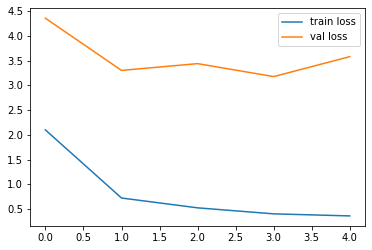

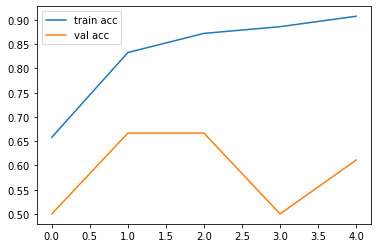

<Figure size 432x288 with 0 Axes>

In [18]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# saving it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [20]:
#####predicting test_set

y_pred = model.predict(test_set)

In [21]:
y_pred

array([[8.60828138e-08, 3.19690713e-07, 9.08298612e-01, 9.17009637e-02],
       [7.42029840e-07, 5.28217752e-05, 9.99855042e-01, 9.13932672e-05],
       [4.10832965e-11, 9.98007953e-01, 1.65965514e-06, 1.99039117e-03],
       [7.66423470e-12, 4.98401701e-01, 8.44909664e-07, 5.01597464e-01],
       [1.65796345e-13, 8.77127349e-01, 1.07300284e-05, 1.22861877e-01],
       [5.96026353e-12, 9.89336848e-01, 2.18323711e-03, 8.47990531e-03],
       [1.50274029e-10, 1.07683582e-06, 1.05684027e-02, 9.89430547e-01],
       [7.69477353e-08, 4.80890139e-06, 9.99625206e-01, 3.69916845e-04],
       [1.81349422e-10, 9.63964045e-01, 2.26080374e-04, 3.58099043e-02],
       [6.65182459e-18, 9.99999046e-01, 1.27314118e-10, 1.01008300e-06],
       [3.00775852e-15, 1.26918181e-04, 9.99872923e-01, 1.76258098e-07],
       [2.71570571e-18, 9.99995589e-01, 4.36435021e-09, 4.45477599e-06],
       [2.57370084e-05, 1.03218284e-04, 9.99514341e-01, 3.56777688e-04],
       [3.49561201e-15, 8.81115854e-01, 3.72164823e

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([2, 2, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [11]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))

In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'